/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Loading dataset...
Performing basic EDA...


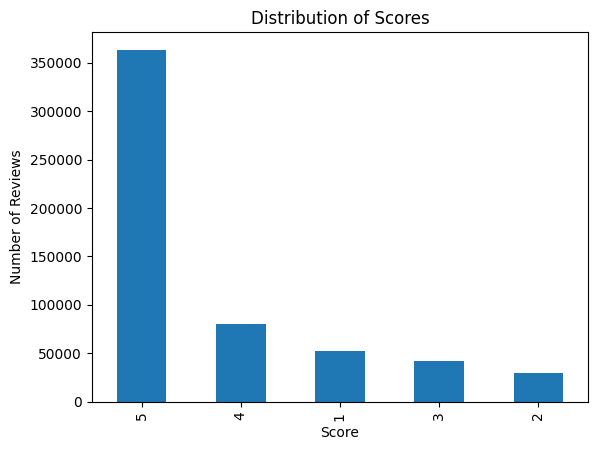

/tmp/ipykernel_42/2625940310.py:27: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['review_length'], bins=50, kde=False)


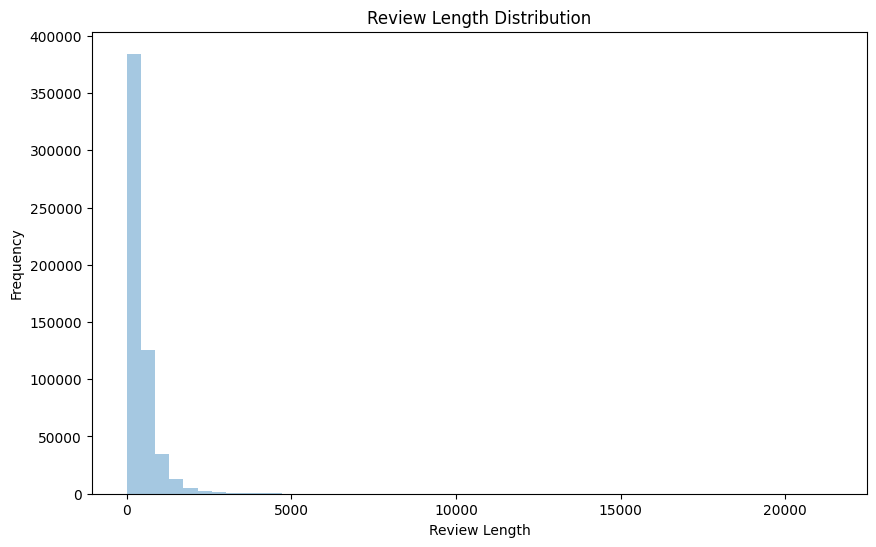

Splitting data...
Starting training...
Epoch 1/3
1250/1250 [==============================] - 497s 393ms/step - loss: 1.2951 - accuracy: 0.4303 - val_loss: 1.1784 - val_accuracy: 0.4909
Epoch 2/3
1250/1250 [==============================] - 439s 351ms/step - loss: 1.0933 - accuracy: 0.5411 - val_loss: 1.1438 - val_accuracy: 0.5210
Epoch 3/3
1250/1250 [==============================] - 434s 347ms/step - loss: 0.9796 - accuracy: 0.5976 - val_loss: 1.1379 - val_accuracy: 0.5281


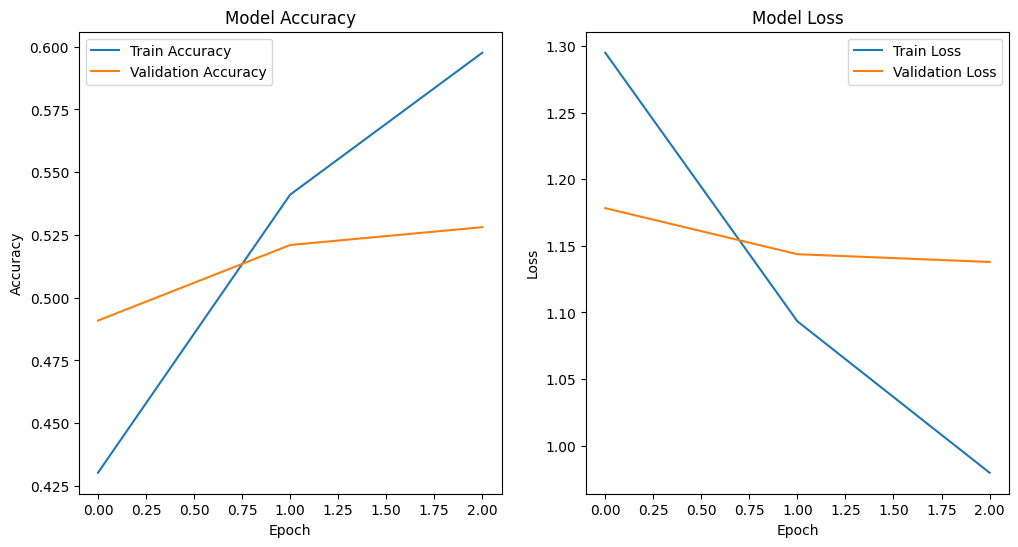

1/1 [==============================] - 0s 394ms/step
Evaluation Result: [[0.05511416 0.10669598 0.23863705 0.41773486 0.18181789]]


In [ ]:
# PADEDHAM, MS. AKHILA <AP72332N@PACE.EDU>
# VANKA, MS. SRIJA <SV90712N@PACE.EDU>
# PADMA, MR. ASHISH <AP94959N@PACE.EDU>
# MAANINI, MS. SOWMYA <SM27447N@PACE.EDU>


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Load the dataset
print("Loading dataset...")
df = pd.read_csv('/kaggle/input/amazon-fine-food-reviews/Reviews.csv')
df = df[['Text', 'Score']]  
df = df.dropna()  

print("Performing basic EDA...")
df['Score'].value_counts().plot(kind='bar')
plt.title('Distribution of Scores')
plt.xlabel('Score')
plt.ylabel('Number of Reviews')
plt.show()

df['review_length'] = df['Text'].apply(len)
plt.figure(figsize=(10,6))
sns.distplot(df['review_length'], bins=50, kde=False)
plt.title('Review Length Distribution')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()

dfs = []
for score in range(1, 6):  
    dfs.append(df[df['Score'] == score].sample(n=10000, random_state=1))
df = pd.concat(dfs)

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df['Text'])
sequences = tokenizer.texts_to_sequences(df['Text'])
X = pad_sequences(sequences, maxlen=200)
y = to_categorical(df['Score'] - 1)  

print("Splitting data...")
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=200))
model.add(LSTM(256, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(5, activation='softmax'))  # 5 classes

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print("Starting training...")
history = model.fit(X_train, y_train, batch_size=32, epochs=3, validation_data=(X_val, y_val))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

def evaluate(text):
    sequence = tokenizer.texts_to_sequences([text])
    padded_sequence = pad_sequences(sequence, maxlen=200)
    prediction = model.predict(padded_sequence)
    return prediction

custom_text = "Its good product"
result = evaluate(custom_text)
print("Evaluation Result:", result)
